**Example from**
- https://github.com/RodolfoFerro/pandas_twitter/blob/master/01-extracting-data.md
 **Added some notes and explanation**

**Extracting twitter data (tweepy + pandas)**

In [1]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Twitter App access keys for @user
#required keys and tokens

ACCESS_TOKEN = ''
ACCESS_SECRET = ''
CONSUMER_KEY = ''
CONSUMER_SECRET = ''


In [5]:
# We import our access keys:


# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

**Tweets Extraction**

In [6]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="realDonaldTrump", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

RT @MeatInstitute: "We are grateful to @realDonaldTrump for protecting our nation’s food supply," said @MeatInstitute Pres. &amp; CEO Julie Ann…

No, I think Amash would make a wonderful candidate, especially since he is way behind in his district and has no ch… https://t.co/RMbhUCax4n

THANK YOU @MarkLevinShow! 
https://t.co/GJSNM0LUQH

RT @TrumpWarRoom: Yahoo reporter apologizes to President Trump after making false coronavirus test claim in Oval Office meeting 
https://t.…

At least they admit it. The Failing @nytimes &amp; @washingtonpost never correct their Fake Reporting! https://t.co/3aUKA4826K



**Creating a (pandas) DataFrame**

In [7]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,"RT @MeatInstitute: ""We are grateful to @realDo..."
1,"No, I think Amash would make a wonderful candi..."
2,THANK YOU @MarkLevinShow! \nhttps://t.co/GJSNM...
3,RT @TrumpWarRoom: Yahoo reporter apologizes to...
4,At least they admit it. The Failing @nytimes &...
5,RT @ErinMPerrine: 🚨🚨 TUNE IN NOW 🚨🚨\n\nTonight...
6,RT @TeamTrump: WATCH: Team Trump Online with @...
7,"RT @TeamTrump: Tisa Clark, CEO Of J.D. Clark P..."
8,RT @EquipoTrump: As Trump campaign senior advi...
9,RT @TrumpWarRoom: Joe Biden rambles and strugg...


In [8]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweeted_status', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [9]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1255558366455365634
2020-04-29 18:03:36
Twitter for iPhone
0
3173
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'MeatInstitute', 'name': 'North American Meat Institute', 'id': 30944238, 'id_str': '30944238', 'indices': [3, 17]}, {'screen_name': 'realDonaldTrump', 'name': 'Donald J. Trump', 'id': 25073877, 'id_str': '25073877', 'indices': [39, 55]}, {'screen_name': 'MeatInstitute', 'name': 'North American Meat Institute', 'id': 30944238, 'id_str': '30944238', 'indices': [103, 117]}], 'urls': []}


**Adding relevant info to our dataframe**

In [10]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [11]:
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,"RT @MeatInstitute: ""We are grateful to @realDo...",144,1255558366455365634,2020-04-29 18:03:36,Twitter for iPhone,0,3173
1,"No, I think Amash would make a wonderful candi...",140,1255510996623527936,2020-04-29 14:55:22,Twitter for iPhone,41646,10442
2,THANK YOU @MarkLevinShow! \nhttps://t.co/GJSNM...,50,1255507868280856581,2020-04-29 14:42:56,Twitter for iPhone,45413,14846
3,RT @TrumpWarRoom: Yahoo reporter apologizes to...,140,1255485332339990528,2020-04-29 13:13:23,Twitter for iPhone,0,7670
4,At least they admit it. The Failing @nytimes &...,126,1255484391364665351,2020-04-29 13:09:39,Twitter for iPhone,54994,17476
5,RT @ErinMPerrine: 🚨🚨 TUNE IN NOW 🚨🚨\n\nTonight...,147,1255482641245188108,2020-04-29 13:02:42,Twitter for iPhone,0,3231
6,RT @TeamTrump: WATCH: Team Trump Online with @...,140,1255482613927739393,2020-04-29 13:02:35,Twitter for iPhone,0,3346
7,"RT @TeamTrump: Tisa Clark, CEO Of J.D. Clark P...",140,1255482503349047298,2020-04-29 13:02:09,Twitter for iPhone,0,3542
8,RT @EquipoTrump: As Trump campaign senior advi...,140,1255482443647385602,2020-04-29 13:01:54,Twitter for iPhone,0,5175
9,RT @TrumpWarRoom: Joe Biden rambles and strugg...,124,1255481563195850754,2020-04-29 12:58:25,Twitter for iPhone,0,4471


**Visualization and basic statistics**

**Averages and popularity**

In [12]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 117.915


- To extract more data, we will use some pandas' functionalities:

In [13]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
Happy Birthday to Melania, our great First Lady!
Number of likes: 574952
48 characters.

The tweet with more retweets is: 
RT @realDonaldTrump: BRILLIANT, A MUST WATCH! @RepDanCrenshaw https://t.co/W6pGsJQ2ua
Number of retweets: 93830
85 characters.



**Time series**

- Pandas has its own object for time series. Since we have a whole vector with creation dates, we can construct time series respect tweets lengths, likes and retweets.
- The way we do it is:

In [14]:
# We create time series for data:
tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

- And if we want to plot the time series, pandas already has its own method in the object. We can plot a time series as follows:

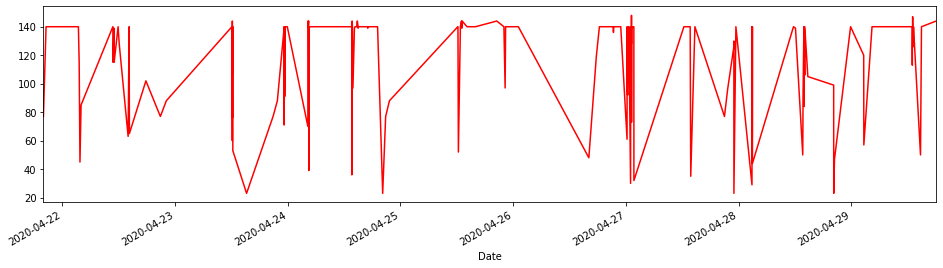

In [15]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

- And to plot the likes versus the retweets in the same chart:

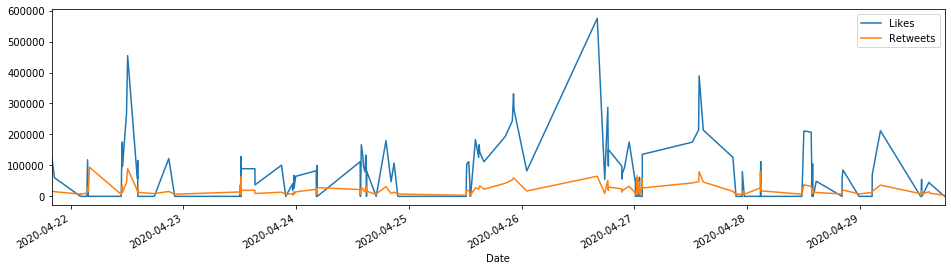

In [16]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

- Pie charts of sources

In [17]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for iPhone


- With the following output, we realize that basically this twitter account has two sources: Creation of content sources: * Twitter for iPhone * Media Studio
- We now count the number of each source and create a pie chart. You'll notice that this code cell is not the most optimized one.

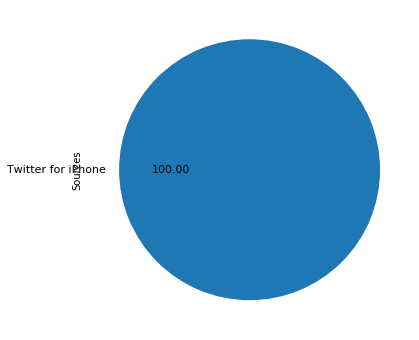

In [18]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

**Sentiment analysis**

- **Importing textblob**
- textblob will allow us to do sentiment analysis in a very simple way. We will also use the re library from Python, which is used to work with regular expressions. 
- For this, I'll provide you two utility functions to: a) clean text (which means that any symbol distinct to an alphanumeric value will be remapped into a new one that satisfies this condition), and b) create a classifier to analyze the polarity of each tweet after cleaning the text in it. I won't explain the specific way in which the function that cleans works, since it would be extended and it might be better understood in the official redocumentation.

In [19]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [20]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,"RT @MeatInstitute: ""We are grateful to @realDo...",144,1255558366455365634,2020-04-29 18:03:36,Twitter for iPhone,0,3173,0
1,"No, I think Amash would make a wonderful candi...",140,1255510996623527936,2020-04-29 14:55:22,Twitter for iPhone,41646,10442,1
2,THANK YOU @MarkLevinShow! \nhttps://t.co/GJSNM...,50,1255507868280856581,2020-04-29 14:42:56,Twitter for iPhone,45413,14846,0
3,RT @TrumpWarRoom: Yahoo reporter apologizes to...,140,1255485332339990528,2020-04-29 13:13:23,Twitter for iPhone,0,7670,-1
4,At least they admit it. The Failing @nytimes &...,126,1255484391364665351,2020-04-29 13:09:39,Twitter for iPhone,54994,17476,-1
5,RT @ErinMPerrine: 🚨🚨 TUNE IN NOW 🚨🚨\n\nTonight...,147,1255482641245188108,2020-04-29 13:02:42,Twitter for iPhone,0,3231,1
6,RT @TeamTrump: WATCH: Team Trump Online with @...,140,1255482613927739393,2020-04-29 13:02:35,Twitter for iPhone,0,3346,0
7,"RT @TeamTrump: Tisa Clark, CEO Of J.D. Clark P...",140,1255482503349047298,2020-04-29 13:02:09,Twitter for iPhone,0,3542,1
8,RT @EquipoTrump: As Trump campaign senior advi...,140,1255482443647385602,2020-04-29 13:01:54,Twitter for iPhone,0,5175,0
9,RT @TrumpWarRoom: Joe Biden rambles and strugg...,124,1255481563195850754,2020-04-29 12:58:25,Twitter for iPhone,0,4471,0


**Analyzing the results**
- To have a simple way to verify the results, we will count the number of neutral, positive and negative tweets and extract the percentages.

In [21]:
# We construct lists with classified tweets:
pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

- Now that we have the lists, we just print the percentages:

In [22]:
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 48.0%
Percentage of neutral tweets: 34.0%
Percentage de negative tweets: 18.0%
